# Load data and libraries

In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.3
✔ tibble  3.0.6     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
outbreak_clean_df <- readRDS("../data/outbreak_clean_df.RDS")

In [3]:
summary(outbreak_clean_df)

 interviewee_id  interviewer        interview_date       a_1_initials      
 Min.   : 1.00   Length:58          Min.   :2021-01-15   Length:58         
 1st Qu.:15.25   Class :character   1st Qu.:2021-01-15   Class :character  
 Median :29.50   Mode  :character   Median :2021-01-15   Mode  :character  
 Mean   :29.50                      Mean   :2021-01-15                     
 3rd Qu.:43.75                      3rd Qu.:2021-01-15                     
 Max.   :58.00                      Max.   :2021-01-15                     
                                                                           
    a_1_age                        a_2_gender a_self_identified_gender
 Min.   : 5.00   Male                   :26   Length:58               
 1st Qu.: 9.00   Female                 :32   Class :character        
 Median :29.50   Prefer to self-describe: 0   Mode  :character        
 Mean   :24.43   Prefer not to say      : 0                           
 3rd Qu.:35.00   Not recorded        

# Demographics

In [4]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    pull(a_1_age) %>%
    summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00    9.00   28.50   23.59   35.00   43.00 

In [5]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "No") %>%
    pull(a_1_age) %>%
    summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   14.00   31.50   27.07   35.75   44.00 

In [6]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    pull(a_2_gender) %>%
    summary

Male                  Female Prefer to self-describe 
                     20                      24                       0 
      Prefer not to say            Not recorded 
                      0                       0

In [7]:
24/44 * 100

[1] 54.54545

In [8]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "No") %>%
    pull(a_2_gender) %>%
    summary

Male                  Female Prefer to self-describe 
                      6                       8                       0 
      Prefer not to say            Not recorded 
                      0                       0

In [9]:
8/14 * 100

[1] 57.14286

# Look at incubation time

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 14 rows containing non-finite values (stat_bin).”


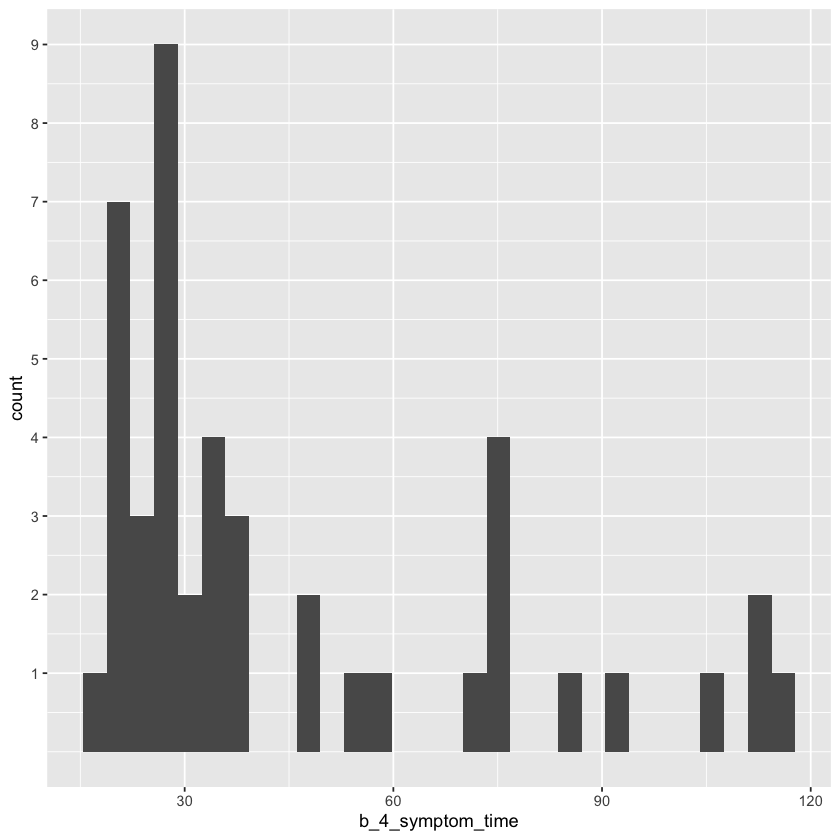

In [10]:
ggplot(outbreak_clean_df, aes(b_4_symptom_time)) +
    geom_histogram() +
    scale_y_continuous(breaks=c(1:10))

Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


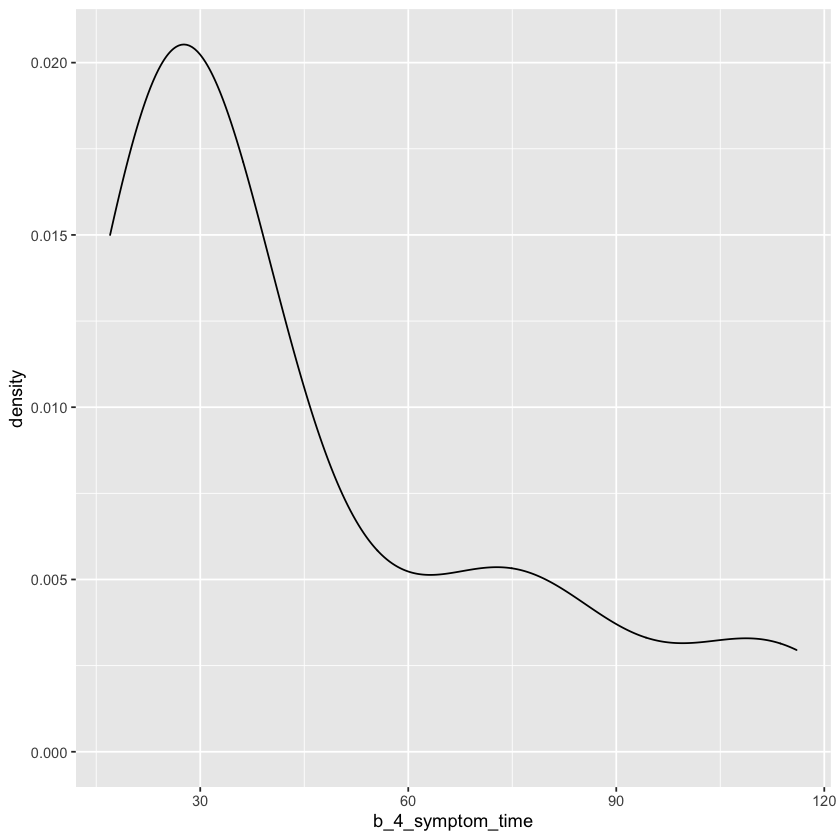

In [11]:
ggplot(outbreak_clean_df, aes(b_4_symptom_time)) +
    geom_density()

In [12]:
median(na.omit(outbreak_clean_df$b_4_symptom_time))

[1] 32

In [13]:
mean(na.omit(outbreak_clean_df$b_4_symptom_time))

[1] 45.43182

In [14]:
IQR(na.omit(outbreak_clean_df$b_4_symptom_time))

[1] 36.75

## Time to onset of symptoms averages ~30 hours but a long tail

# Now look at symptom duration

Warning message:
“Removed 14 rows containing non-finite values (stat_count).”


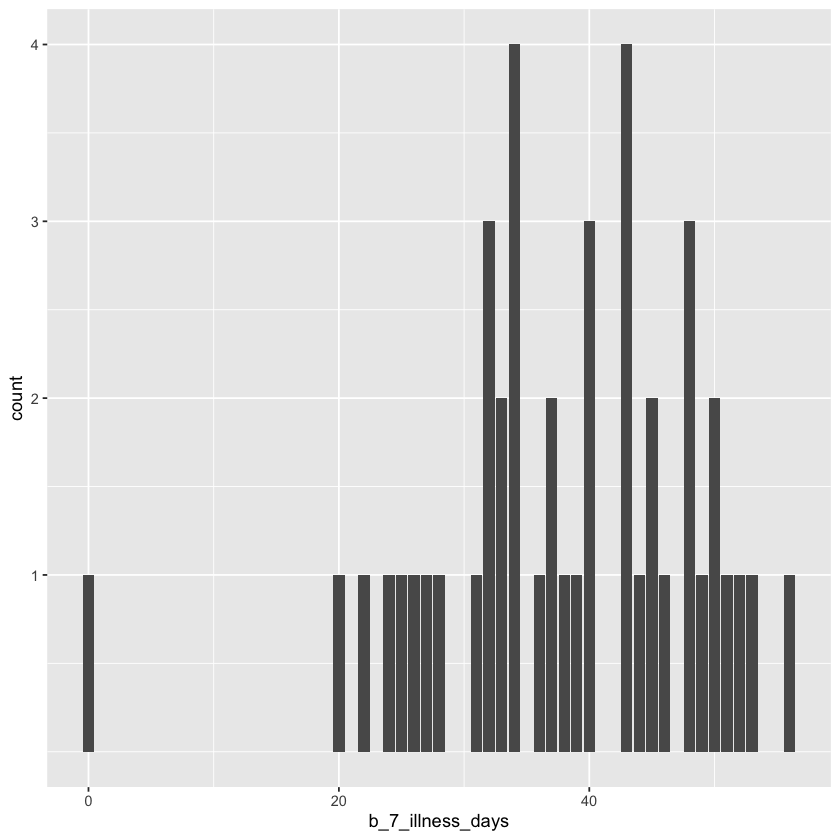

In [15]:
ggplot(outbreak_clean_df, aes(b_7_illness_days)) +
    geom_bar() +
    scale_y_continuous(breaks=c(1:5))

### What's with the outlier at 0?

In [16]:
outbreak_clean_df %>%
    filter(b_7_illness_days == 0) %>%
    select(1:5,7:9,20)

interviewee_id,interviewer,interview_date,a_1_initials,a_1_age,a_self_identified_gender,b_3_experienced_ilness,b_4_symptom_time,b_7_illness_days
<int>,<chr>,<date>,<chr>,<int>,<chr>,<fct>,<int>,<int>
11,abc,2021-01-15,GL,30,.,Yes,87,0


### Must be a typo. Let's exclude

In [17]:
outbreak_clean_df2 <- outbreak_clean_df %>%
    filter(b_7_illness_days != 0)

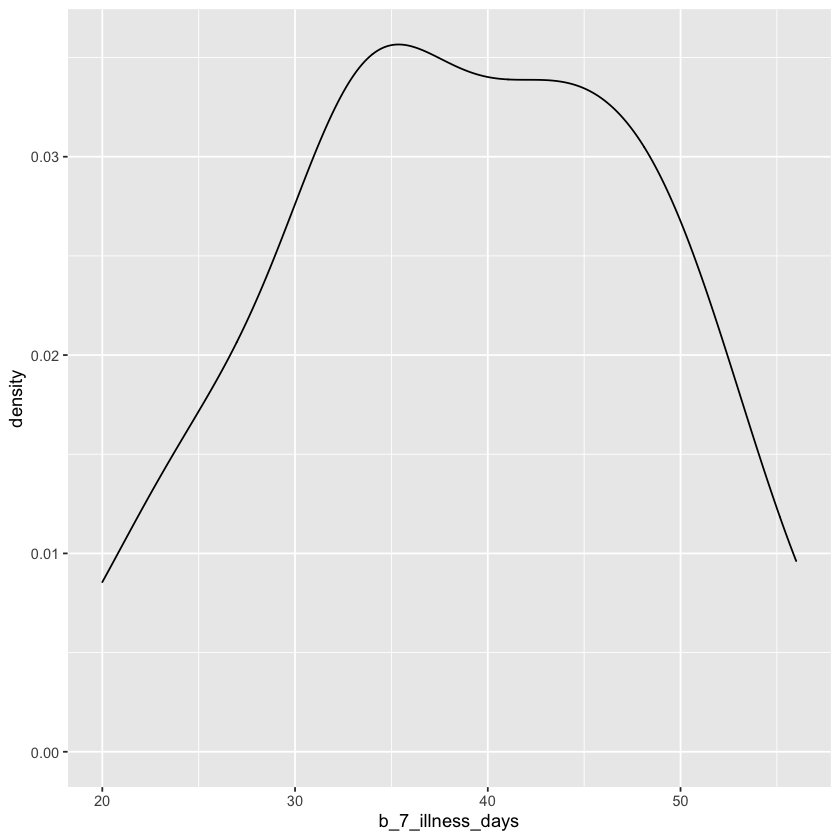

In [18]:
ggplot(outbreak_clean_df2, aes(b_7_illness_days)) +
    geom_density()

In [19]:
median(na.omit(outbreak_clean_df2$b_7_illness_days))

[1] 39

In [20]:
mean(na.omit(outbreak_clean_df2$b_7_illness_days))

[1] 38.72093

In [21]:
IQR(na.omit(outbreak_clean_df2$b_7_illness_days))

[1] 13

## Averages about 39 hours with an interquartile range of 13 hours and a fairly normal distribution

# Main symptoms

In [22]:
outbreak_clean_long_df <- outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    select(interviewee_id, diarrhea, vomiting, blood_in_stool,
           stomach_cramps, nausea, fever, headache, muscle_aches,
           b_6_other_symptoms) %>%
    gather("symptom", "value", -interviewee_id)

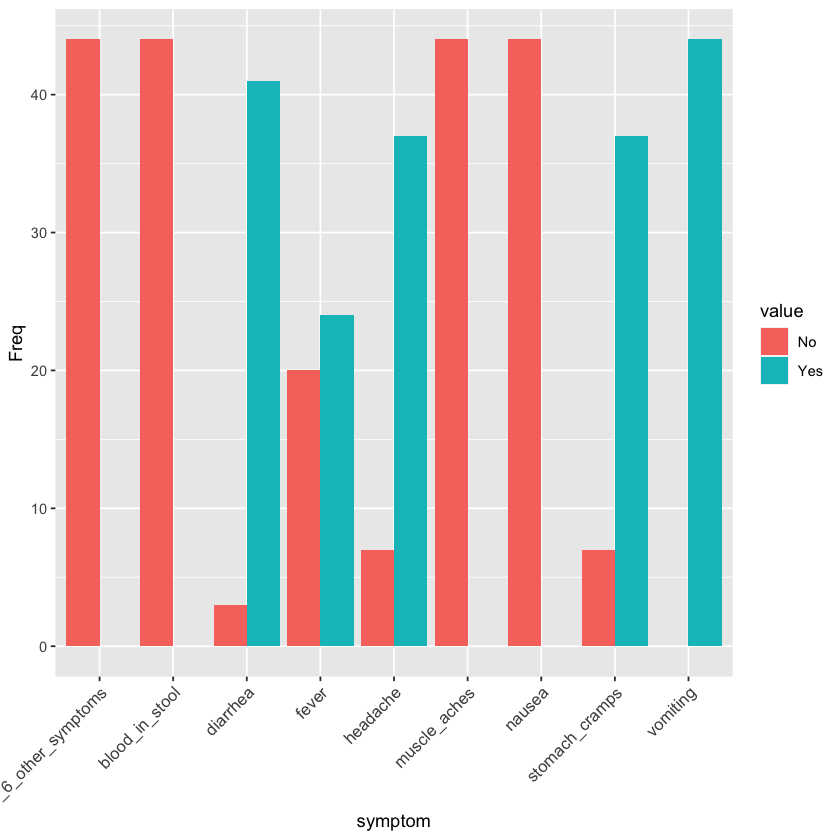

In [23]:
outbreak_clean_long_df2 <- data.frame(with(outbreak_clean_long_df, table(symptom, value)))
ggplot(outbreak_clean_long_df2) +
    geom_bar(aes(x=symptom, y=Freq, fill=value), stat='identity', position='dodge')+
    theme(axis.text.x=element_text(angle=45, size=10, hjust=1, vjust=1))

In [24]:
outbreak_clean_df %>%
    filter(nausea == "Yes")

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


interviewee_id,interviewer,interview_date,a_1_initials,a_1_age,a_2_gender,a_self_identified_gender,b_3_experienced_ilness,b_4_symptom_time,diarrhea,⋯,d_16_symptom_type,d_16_secondary_case_age_2,d_16_date_symptom_onset_2,d_16_symptom_type_2,d_16_secondary_case_age_3,d_16_date_symptom_onset_3,d_16_symptom_type_3,d_17_recent_travel,d_17_destination,d_18_other_information
<int>,<chr>,<date>,<chr>,<int>,<fct>,<chr>,<fct>,<int>,<fct>,⋯,<chr>,<int>,<date>,<chr>,<int>,<date>,<chr>,<fct>,<chr>,<chr>


#### Almost 50% with vomiting, but no nausea? Weird

### Mainly diarrhea, vomiting, cramps, and headache. Decent proportion of fever. No blood in stool. 

## Sounds like *norovirus*

# Look at the association of certain foods with illness

In [25]:
outbreak_symptomatic_food_df <- outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    select(interviewee_id, contains("c_13")) %>%
    gather("food", "value", -interviewee_id)

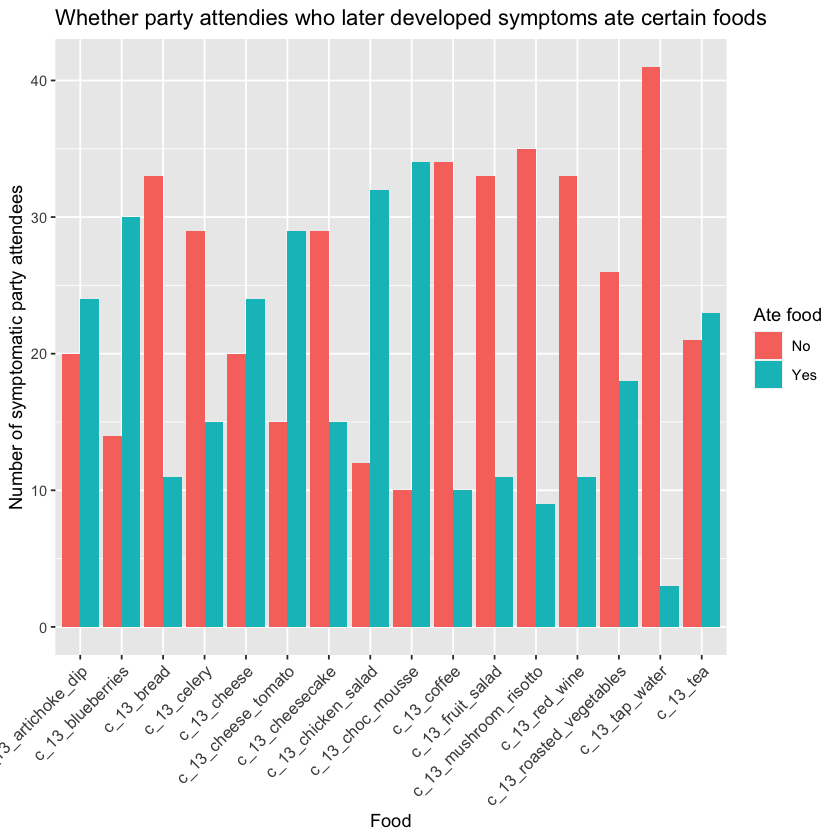

In [26]:
outbreak_symptomatic_food_df2 <- data.frame(with(outbreak_symptomatic_food_df, table(food, value)))
ggplot(outbreak_symptomatic_food_df2) +
    geom_bar(aes(x=food, y=Freq, fill=value), stat='identity', position='dodge')+
    theme(axis.text.x=element_text(angle=45, size=10, hjust=1, vjust=1)) +
    labs(title = "Whether party attendies who later developed symptoms ate certain foods", fill = "Ate food") +
    xlab("Food") + 
    ylab("Number of symptomatic party attendees")

### The most common foods among those who developed symptoms were blueberries, cheese and tomato sandwich, chicken salad, and chocolate mousse

# What foods were eaten by the asymptomatic?

In [27]:
outbreak_asymptomatic_food_df <- outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "No") %>%
    select(interviewee_id, contains("c_13")) %>%
    gather("food", "value", -interviewee_id)

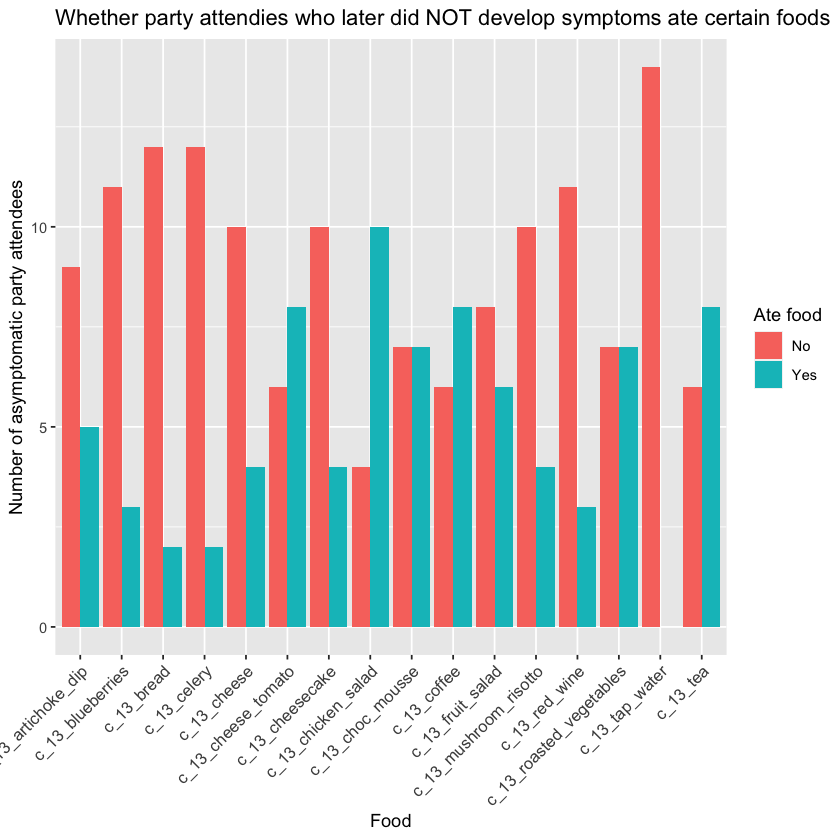

In [28]:
outbreak_asymptomatic_food_df2 <- data.frame(with(outbreak_asymptomatic_food_df, table(food, value)))
ggplot(outbreak_asymptomatic_food_df2) +
    geom_bar(aes(x=food, y=Freq, fill=value), stat='identity', position='dodge')+
    theme(axis.text.x=element_text(angle=45, size=10, hjust=1, vjust=1)) +
    labs(title = "Whether party attendies who later did NOT develop symptoms ate certain foods", fill = "Ate food") +
    xlab("Food") + 
    ylab("Number of asymptomatic party attendees")

### Of the suspect foods (blueberries, cheese and tomato, chicken salad,and chocolate mousse), not many asymptomatics ate blueberries

# Look for differential exposures

In [29]:
count(outbreak_clean_df, b_3_experienced_ilness, c_13_cheese)

b_3_experienced_ilness,c_13_cheese,n
<fct>,<fct>,<int>
No,No,10
No,Yes,4
Yes,No,20
Yes,Yes,24


#### 2x2 tables are nice, but let's graph it instead

In [30]:
plot_food_diffs <- function(indicator, values) {
    food <- match.call() %>% as.character %>% pluck(2) %>% unlist %>% str_split("c_13_") %>% map_chr(2)
    tab <- table(values, indicator)
    ptab <- prop.table(tab, margin=1)
    dframe <- data.frame(experienced_illness=rownames(tab), prop_ate_food=ptab[,2],
                         count_ate_food=tab[,2], food = food)
    plot <- ggplot(dframe) +
        geom_bar(aes(x=experienced_illness, y=prop_ate_food), stat='identity', position='dodge') +
        labs(title = dframe$food[[1]]) +
        ylim(0,1)
    print(plot)
}

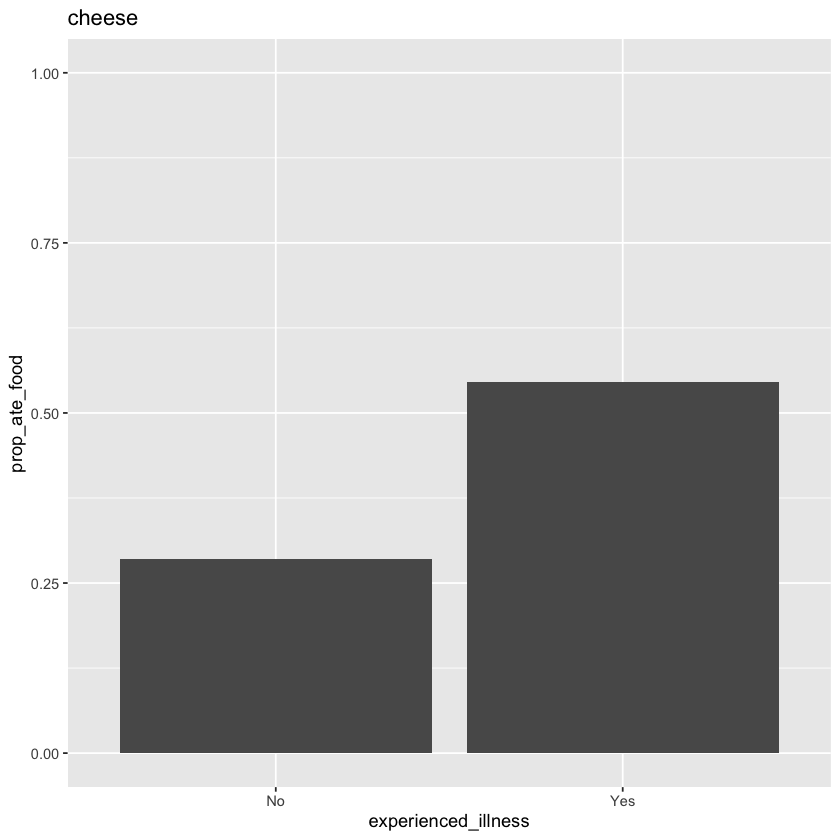

In [31]:
plot_food_diffs(outbreak_clean_df$c_13_cheese, outbreak_clean_df$b_3_experienced_ilness)

### Some difference, but not huge, and total proportions for both are lowish. Let's do the same for all the foods

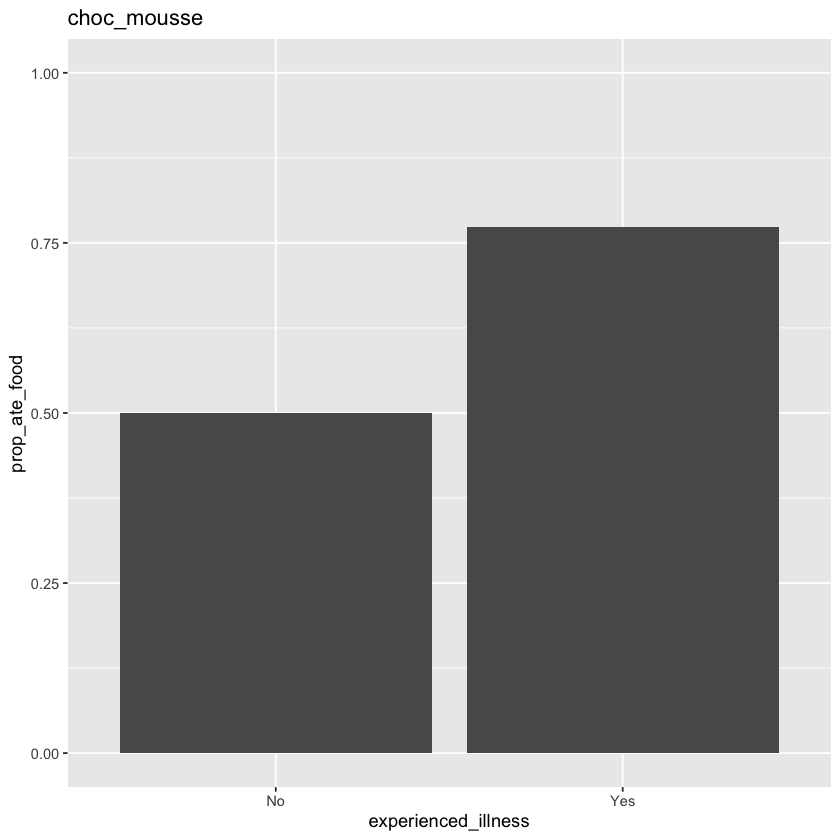

In [32]:
plot_food_diffs(outbreak_clean_df$c_13_choc_mousse, outbreak_clean_df$b_3_experienced_ilness)

# Lots of people who ate chocolate mousse got sick, but so did lots who did not eat it

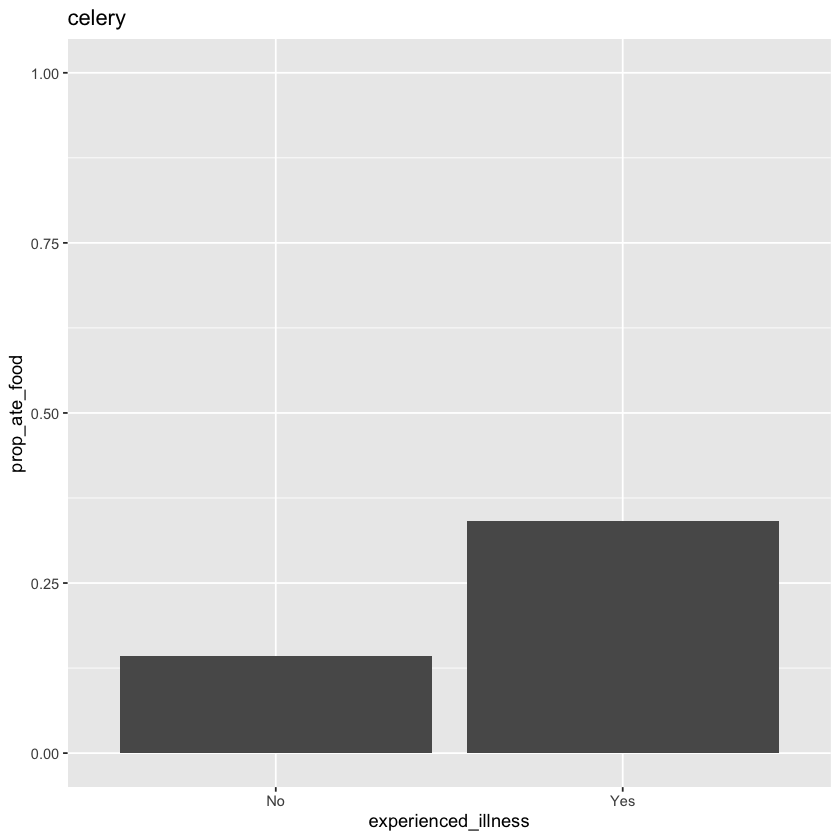

In [33]:
plot_food_diffs(outbreak_clean_df$c_13_celery, outbreak_clean_df$b_3_experienced_ilness)

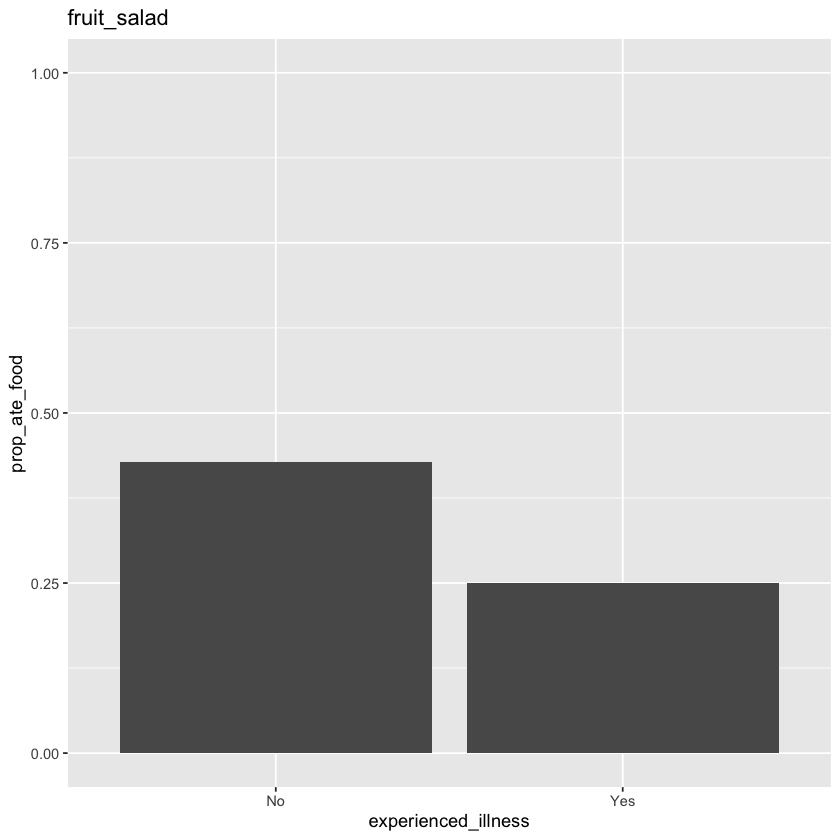

In [34]:
plot_food_diffs(outbreak_clean_df$c_13_fruit_salad, outbreak_clean_df$b_3_experienced_ilness)

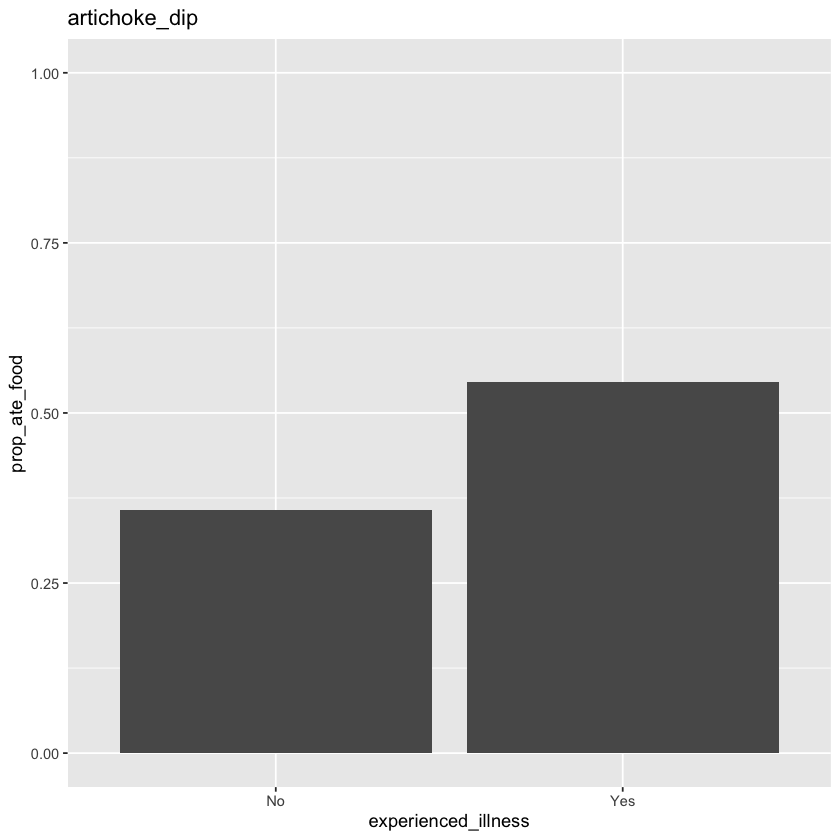

In [35]:
plot_food_diffs(outbreak_clean_df$c_13_artichoke_dip, outbreak_clean_df$b_3_experienced_ilness)

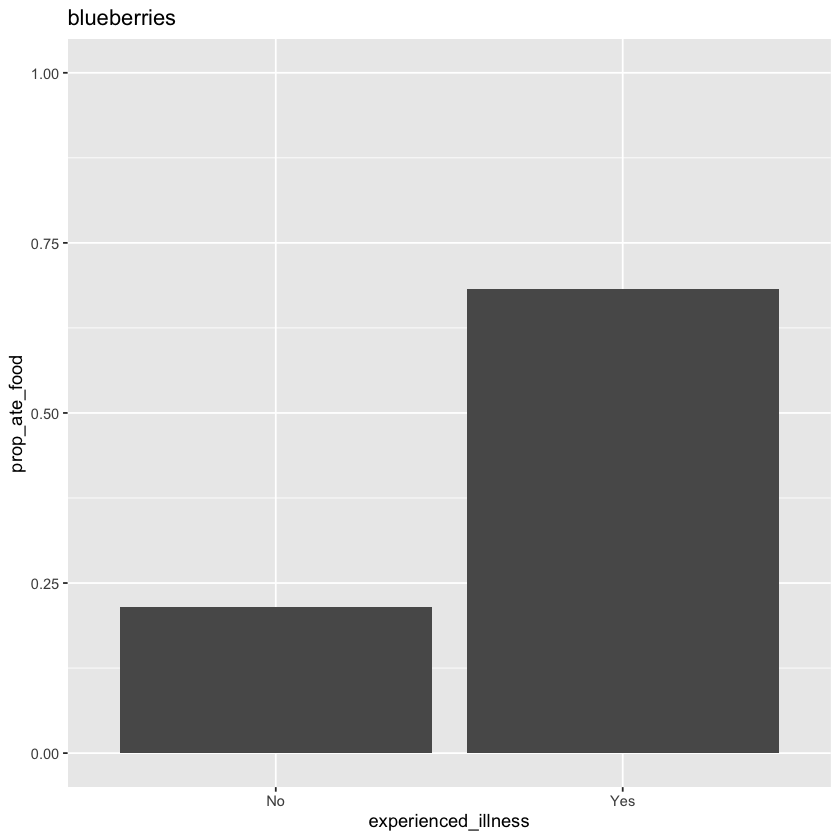

In [36]:
plot_food_diffs(outbreak_clean_df$c_13_blueberries, outbreak_clean_df$b_3_experienced_ilness)

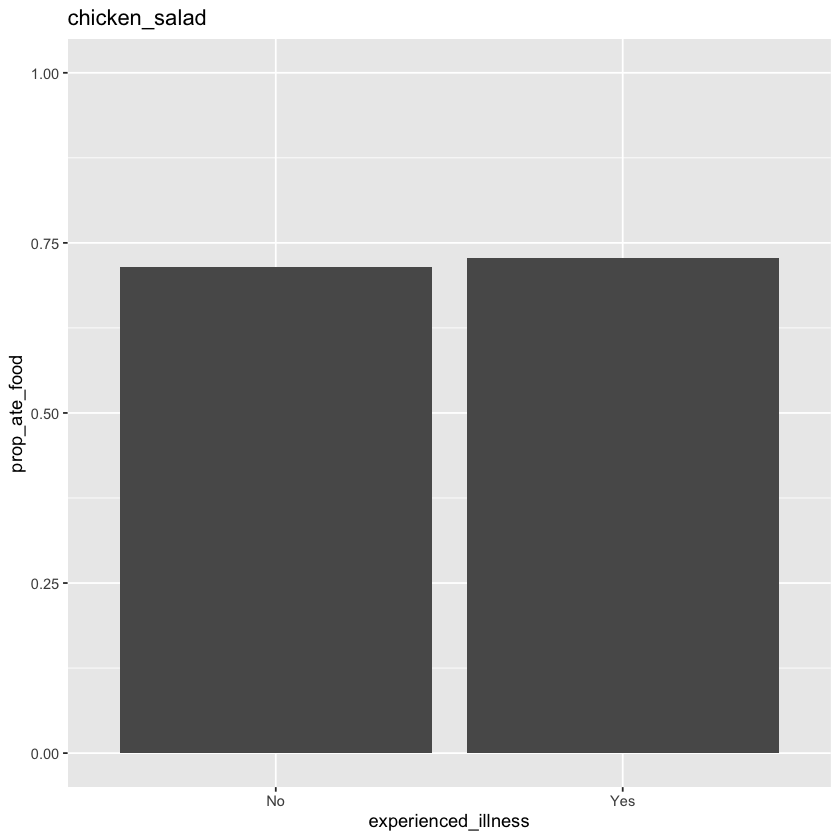

In [37]:
plot_food_diffs(outbreak_clean_df$c_13_chicken_salad, outbreak_clean_df$b_3_experienced_ilness)

#### No difference  between groups

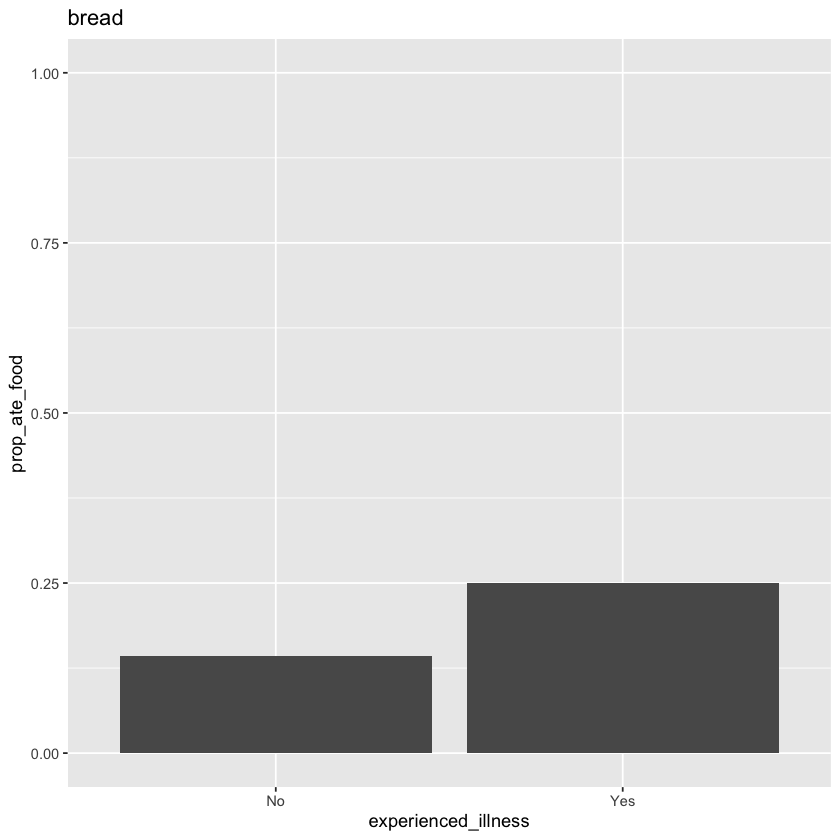

In [38]:
plot_food_diffs(outbreak_clean_df$c_13_bread, outbreak_clean_df$b_3_experienced_ilness)

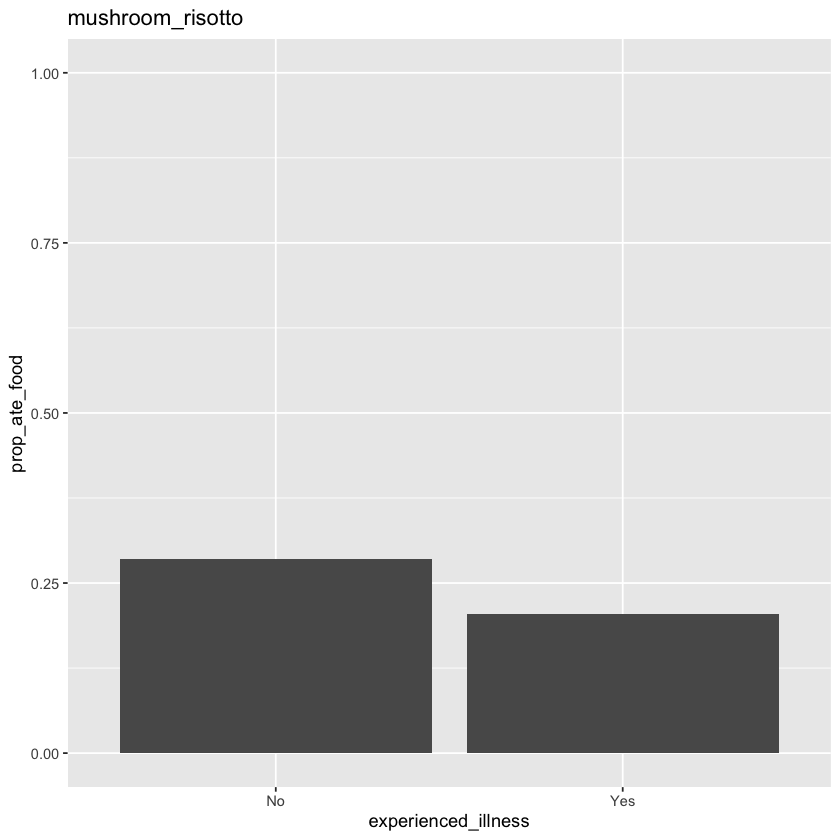

In [39]:
plot_food_diffs(outbreak_clean_df$c_13_mushroom_risotto, outbreak_clean_df$b_3_experienced_ilness)

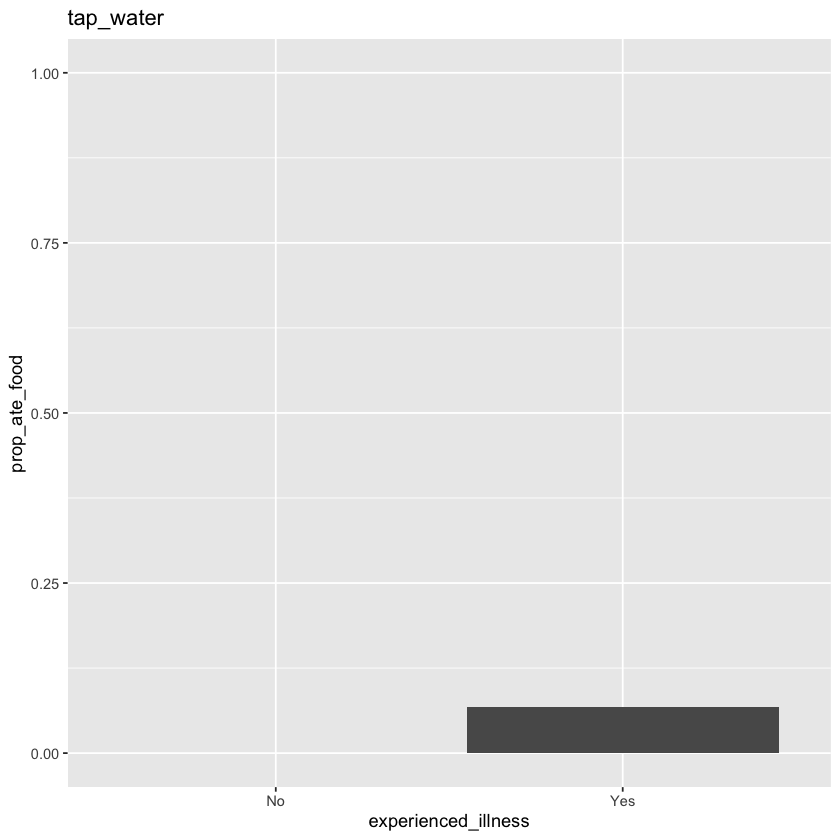

In [40]:
plot_food_diffs(outbreak_clean_df$c_13_tap_water, outbreak_clean_df$b_3_experienced_ilness)

### Barely anyone drank tap water overall

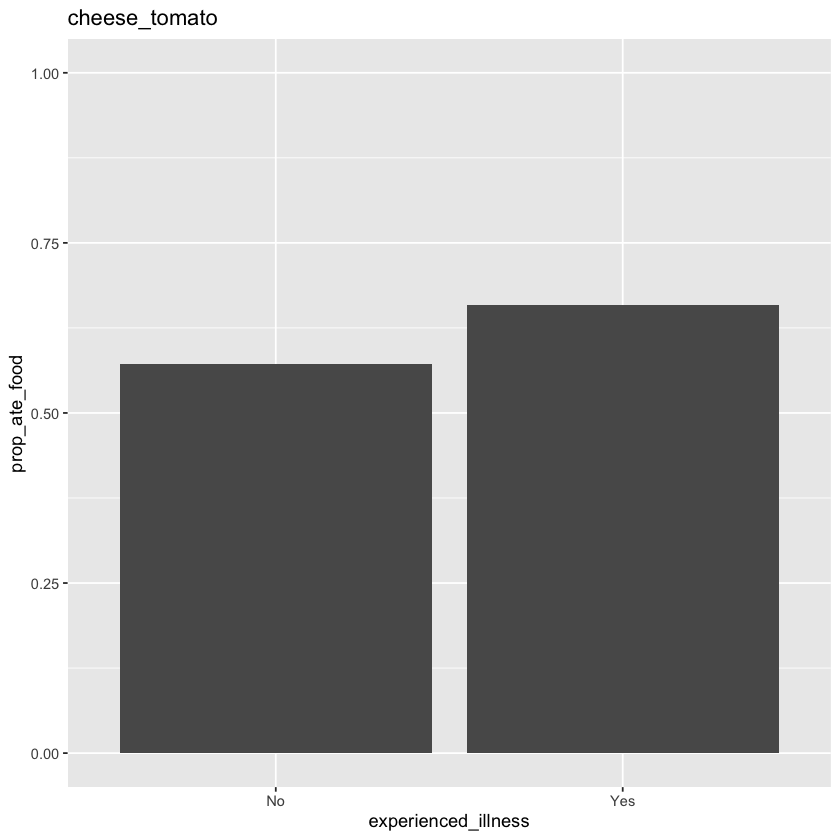

In [41]:
plot_food_diffs(outbreak_clean_df$c_13_cheese_tomato, outbreak_clean_df$b_3_experienced_ilness)

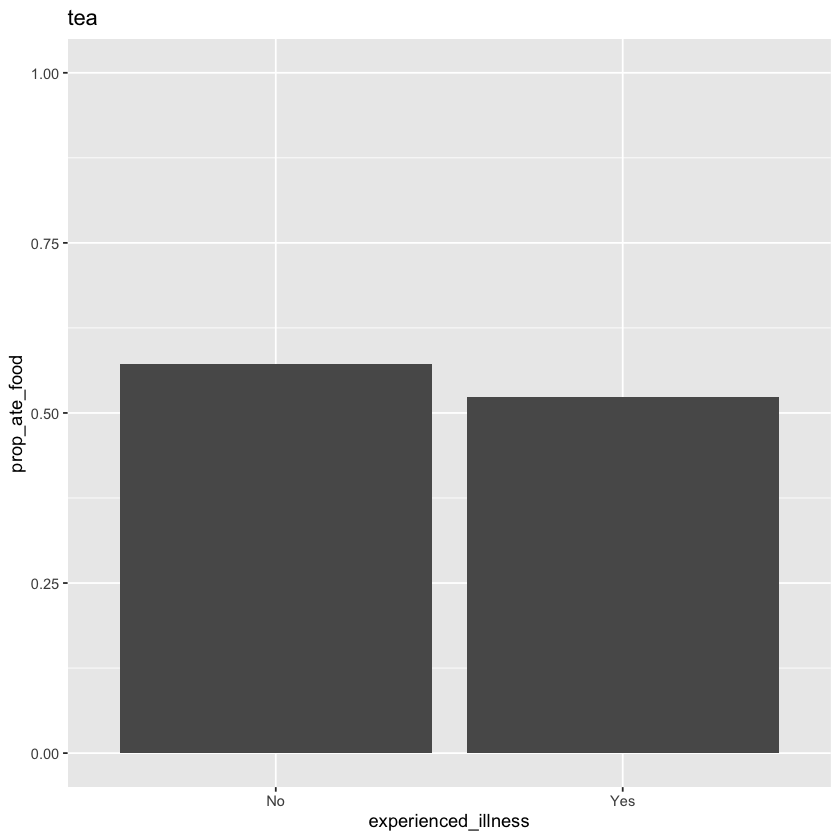

In [42]:
plot_food_diffs(outbreak_clean_df$c_13_tea, outbreak_clean_df$b_3_experienced_ilness)

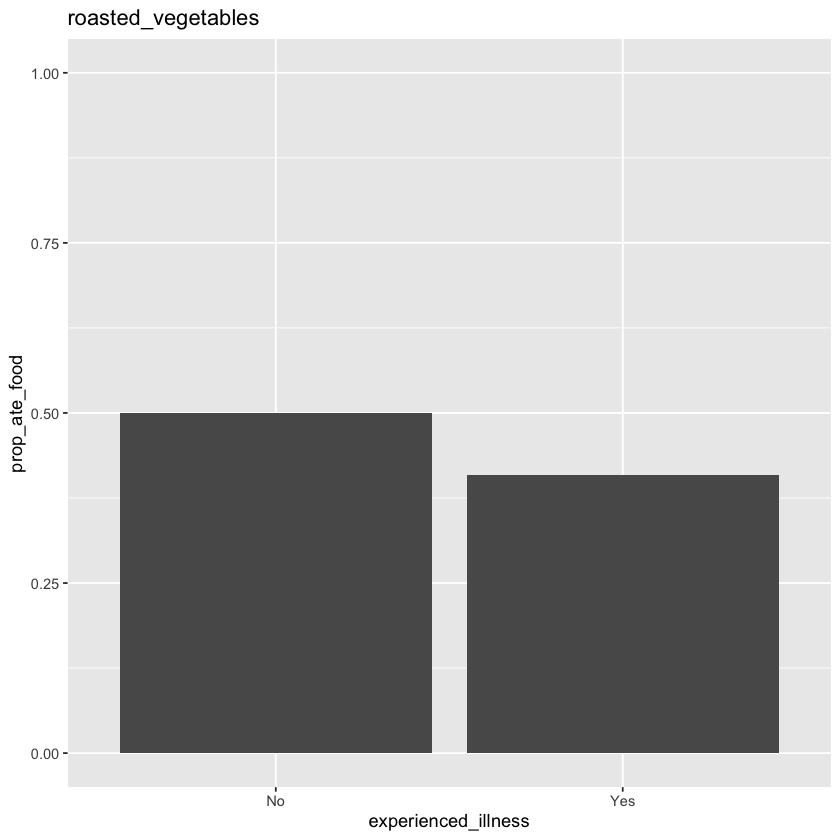

In [43]:
plot_food_diffs(outbreak_clean_df$c_13_roasted_vegetables, outbreak_clean_df$b_3_experienced_ilness)

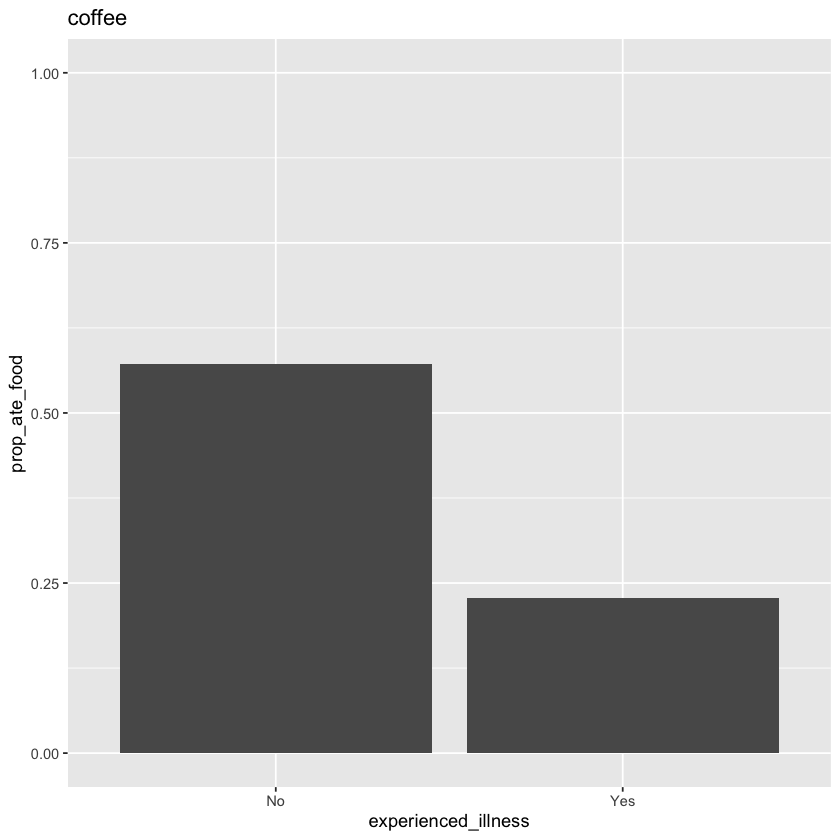

In [44]:
plot_food_diffs(outbreak_clean_df$c_13_coffee, outbreak_clean_df$b_3_experienced_ilness)

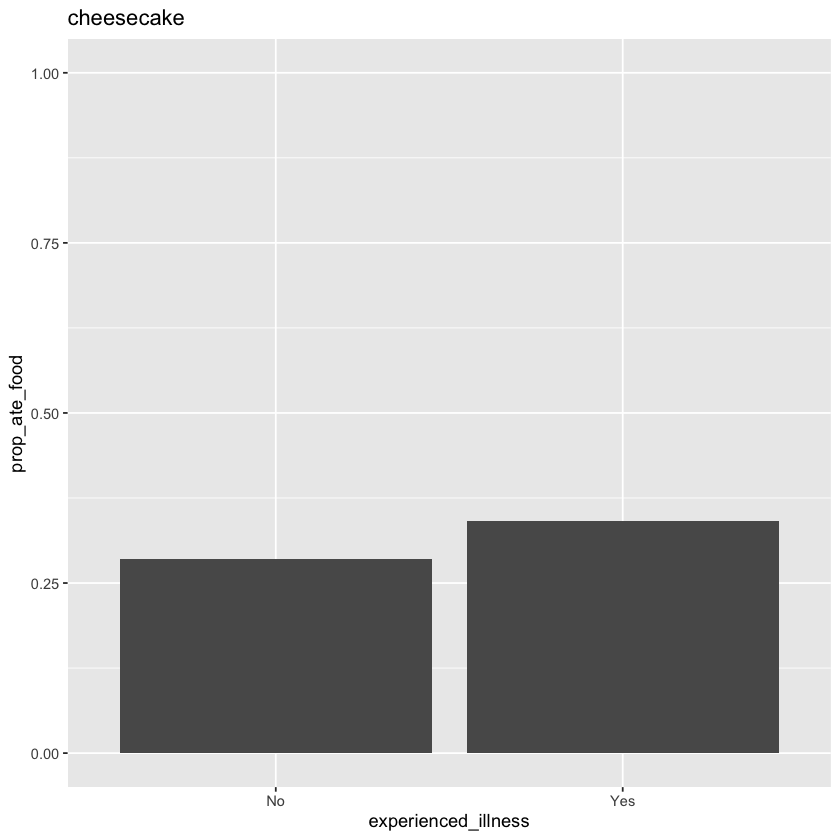

In [45]:
plot_food_diffs(outbreak_clean_df$c_13_cheesecake, outbreak_clean_df$b_3_experienced_ilness)

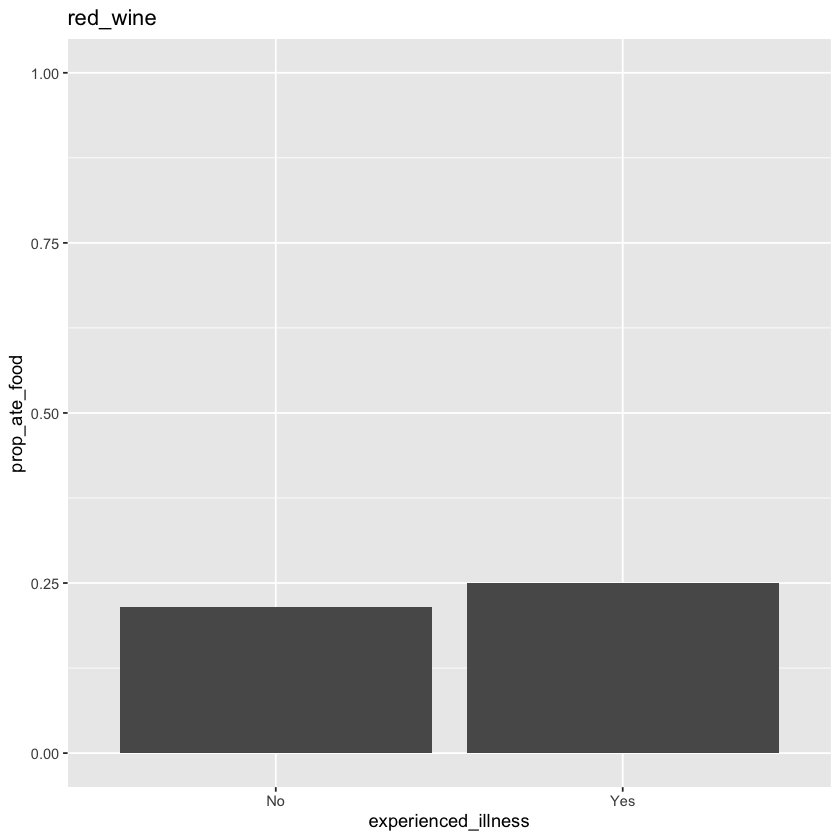

In [46]:
plot_food_diffs(outbreak_clean_df$c_13_red_wine, outbreak_clean_df$b_3_experienced_ilness)

## Overall, blueberries are looking suspicious, but could it be that some of the cases that weren't exposed to blueberries were secondary?

# Let's try to determine primary from secondary cases

Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


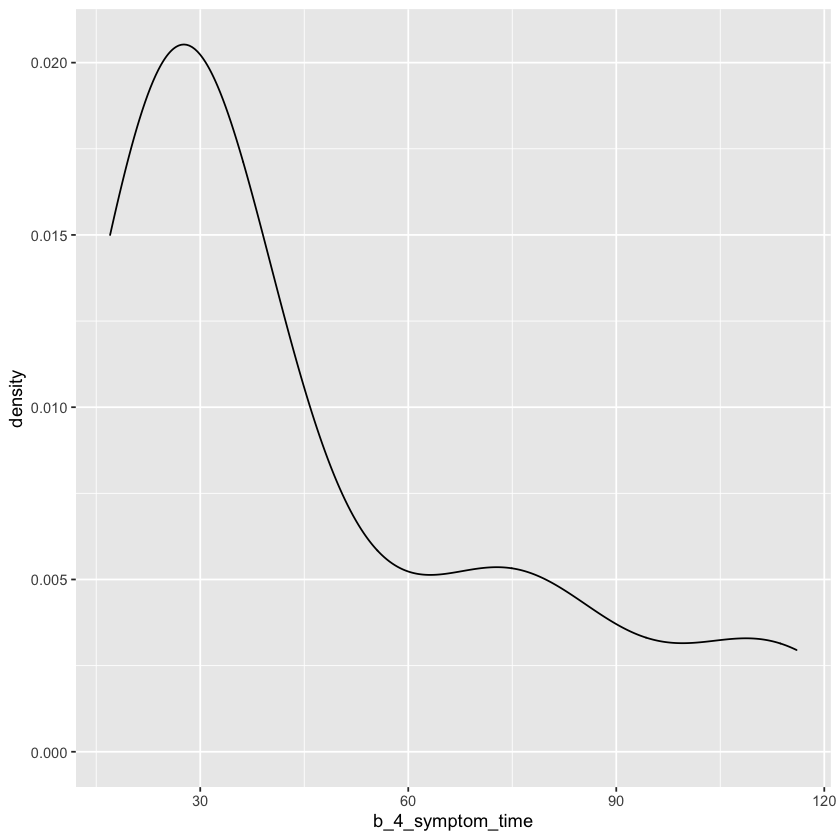

In [47]:
ggplot(outbreak_clean_df, aes(b_4_symptom_time)) +
    geom_density()

# Cases drop off after 48 hours with a long tail. Let's separate out those who got sick in the first 48 hours

In [48]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    nrow

[1] 44

In [49]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    filter(b_4_symptom_time <= 48) %>%
    nrow

[1] 30

In [50]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    filter(b_4_symptom_time <= 48) %>%
    nrow /
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    nrow * 100

[1] 68.18182

### 30 out of 44 (68%) cases happened within 48 hours

In [51]:
colnames(outbreak_clean_df)

[1] "interviewee_id"            "interviewer"              
 [3] "interview_date"            "a_1_initials"             
 [5] "a_1_age"                   "a_2_gender"               
 [7] "a_self_identified_gender"  "b_3_experienced_ilness"   
 [9] "b_4_symptom_time"          "diarrhea"                 
[11] "vomiting"                  "blood_in_stool"           
[13] "stomach_cramps"            "nausea"                   
[15] "fever"                     "headache"                 
[17] "muscle_aches"              "b_6_other_symptoms"       
[19] "b_6_other_text"            "b_7_illness_days"         
[21] "b_8_recovered"             "b_9_contacted_provider"   
[23] "b_10_stool_sample"         "b_11_blood_sample"        
[25] "b_12_diagnosis"            "c_13_cheese"              
[27] "c_13_choc_mousse"          "c_13_celery"              
[29] "c_13_fruit_salad"          "c_13_artichoke_dip"       
[31] "c_13_blueberries"          "c_13_chicken_salad"       
[33] "c_13_bread"                "c_13_mushroom_risotto"    
[35] "c_13_tap_water"            "c_13_cheese_tomato"       
[37] "c_13_tea"                  "c_13_roasted_vegetables"  
[39] "c_13_coffee"               "c_13_cheesecake"          
[41] "c_13_red_wine"             "c_14_brought_items"       
[43] "c_14_item_brought"         "c_14_item_location"       
[45] "d_15_secondary_cases"      "d_16_secondary_case_age"  
[47] "d_16_date_symptom_onset"   "d_16_symptom_type"        
[49] "d_16_secondary_case_age_2" "d_16_date_symptom_onset_2"
[51] "d_16_symptom_type_2"       "d_16_secondary_case_age_3"
[53] "d_16_date_symptom_onset_3" "d_16_symptom_type_3"      
[55] "d_17_recent_travel"        "d_17_destination"         
[57] "d_18_other_information"

In [52]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    filter(b_4_symptom_time >48) %>%
    nrow

[1] 14

In [53]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    filter(b_4_symptom_time >48) %>%
    pull(d_18_other_information)

[1] "5 other household members who attended the party developed symptoms"  
 [2] "5 other household members who attended the party developed symptoms"  
 [3] "5 other household members who attended the party developed symptoms"  
 [4] "2 other household members who attended the party developed symptoms"  
 [5] "2 other household members who attended the party develop symptoms"    
 [6] "1 other household member/s who attended the party developed symptoms" 
 [7] "2 other householde member/s who attended the party developed symptoms"
 [8] "."                                                                    
 [9] "1 other household member/s who attended the party developed symptoms" 
[10] "2 other household member/s who attended the party developed symptoms" 
[11] "2 other household member/s who attended the party developed symptoms" 
[12] "2 other household member/s who attended the party developed symptoms" 
[13] "2 other household member/s who attended the party developed symptoms" 
[14] "3 other household member/s who attended the party developed symptoms"

### Almost all of the probable secondary cases had a household member who attended the party

In [54]:
outbreak_clean_df %>%
    filter(b_3_experienced_ilness == "Yes") %>%
    filter(b_4_symptom_time >48) %>%
    filter(d_18_other_information == ".")

interviewee_id,interviewer,interview_date,a_1_initials,a_1_age,a_2_gender,a_self_identified_gender,b_3_experienced_ilness,b_4_symptom_time,diarrhea,⋯,d_16_symptom_type,d_16_secondary_case_age_2,d_16_date_symptom_onset_2,d_16_symptom_type_2,d_16_secondary_case_age_3,d_16_date_symptom_onset_3,d_16_symptom_type_3,d_17_recent_travel,d_17_destination,d_18_other_information
<int>,<chr>,<date>,<chr>,<int>,<fct>,<chr>,<fct>,<int>,<fct>,⋯,<chr>,<int>,<date>,<chr>,<int>,<date>,<chr>,<fct>,<chr>,<chr>
19,abc,2021-01-15,PW,43,Female,.,Yes,49,Yes,⋯,.,NA,NA,.,NA,NA,.,No,.,.


### The only one who didn't had a time to symptoms of 49 hours, just over our cutoff. Let's include her

In [55]:
outbreak_49h_df <- outbreak_clean_df %>%
    mutate(illness_first_49h = factor(if_else(b_3_experienced_ilness == "Yes" &
                                              b_4_symptom_time <= 49, "Yes", "No")))

In [56]:
outbreak_49h_df %>%
    count(illness_first_49h, c_13_blueberries)

illness_first_49h,c_13_blueberries,n
<fct>,<fct>,<int>
No,No,20
No,Yes,7
Yes,No,5
Yes,Yes,26


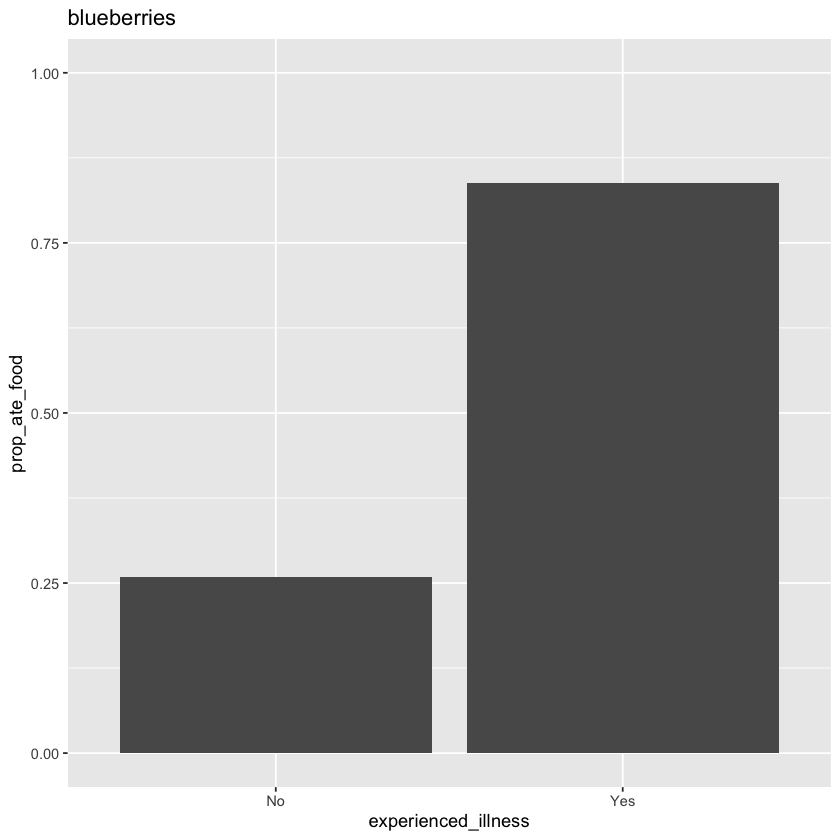

In [57]:
plot_food_diffs(outbreak_49h_df$c_13_blueberries, outbreak_49h_df$illness_first_49h)

### Blueberries still looking suspicious. Look at the other 3 suspects,  cheese and tomato, chicken salad,and chocolate mousse

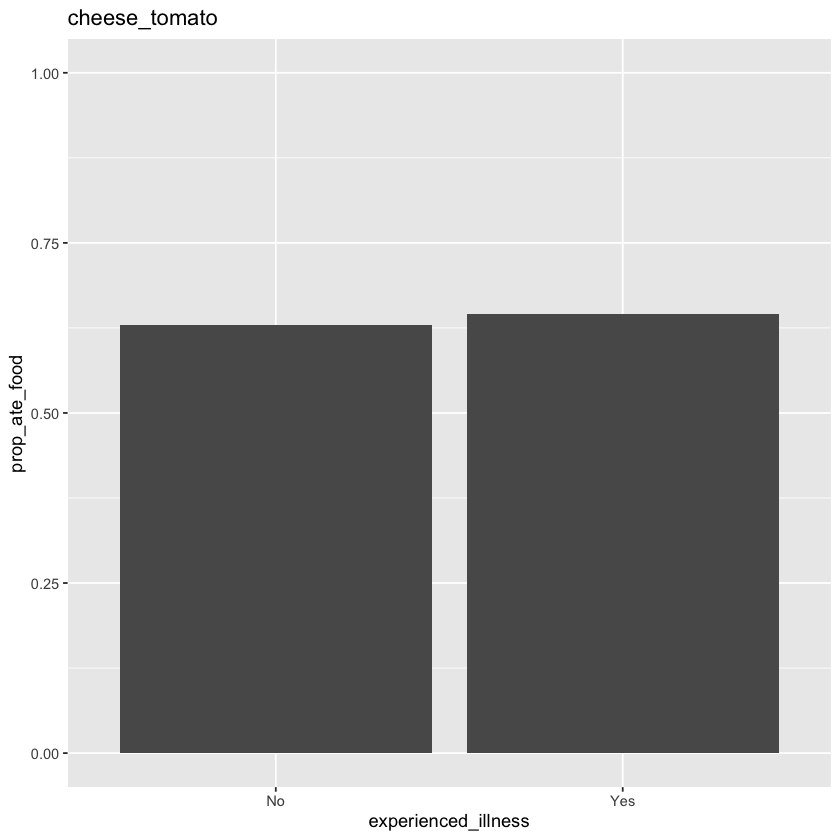

In [58]:
plot_food_diffs(outbreak_49h_df$c_13_cheese_tomato, outbreak_49h_df$illness_first_49h)

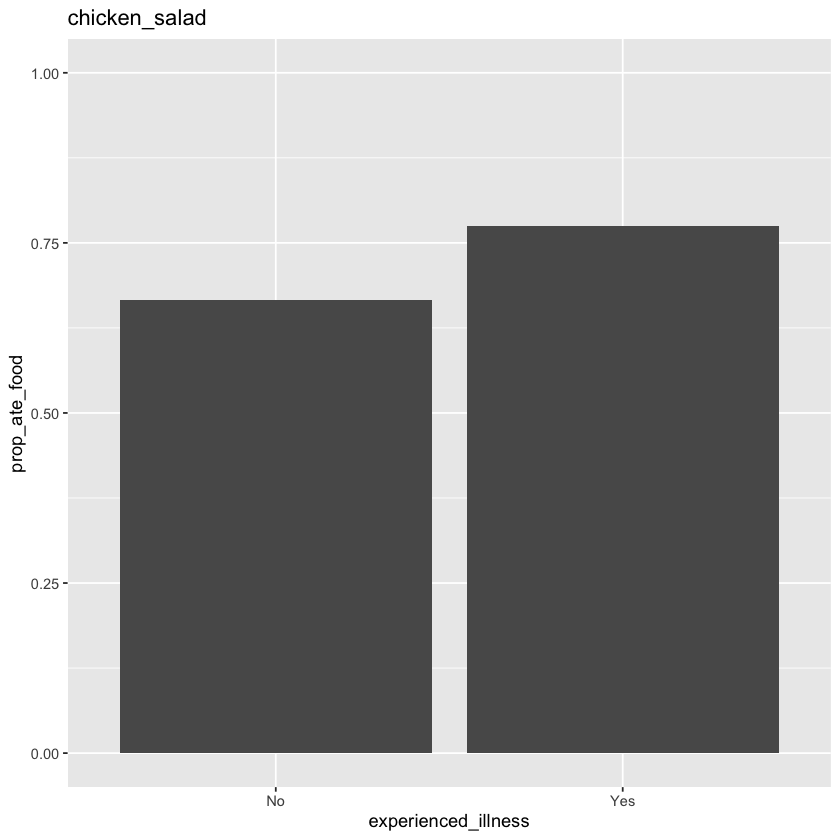

In [59]:
plot_food_diffs(outbreak_49h_df$c_13_chicken_salad, outbreak_49h_df$illness_first_49h)

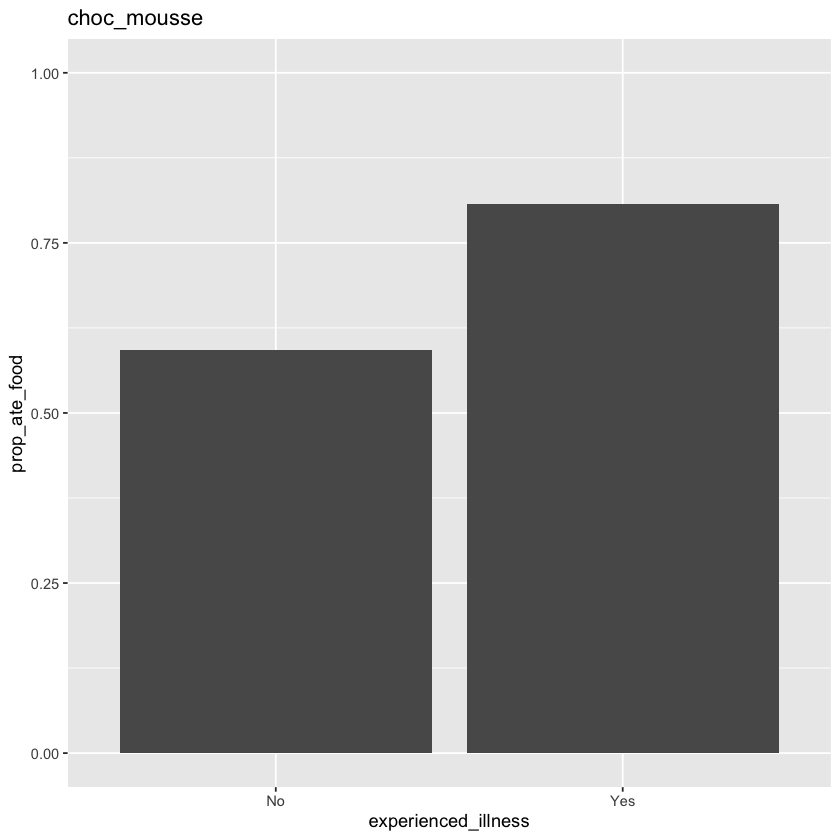

In [60]:
plot_food_diffs(outbreak_49h_df$c_13_choc_mousse, outbreak_49h_df$illness_first_49h)

# These are even less likely now. Looks like blueberries are a likely culprit, but what about those who got sick and weren't exposed?

In [61]:
outbreak_49h_df %>%
    filter(illness_first_49h == "Yes") %>%
    filter(c_13_blueberries ==  "No")

interviewee_id,interviewer,interview_date,a_1_initials,a_1_age,a_2_gender,a_self_identified_gender,b_3_experienced_ilness,b_4_symptom_time,diarrhea,⋯,d_16_secondary_case_age_2,d_16_date_symptom_onset_2,d_16_symptom_type_2,d_16_secondary_case_age_3,d_16_date_symptom_onset_3,d_16_symptom_type_3,d_17_recent_travel,d_17_destination,d_18_other_information,illness_first_49h
<int>,<chr>,<date>,<chr>,<int>,<fct>,<chr>,<fct>,<int>,<fct>,⋯,<int>,<date>,<chr>,<int>,<date>,<chr>,<fct>,<chr>,<chr>,<fct>
8,abc,2021-01-15,AG,28,Male,.,Yes,33,Yes,⋯,NA,NA,.,NA,NA,.,No,.,2 other household members who attended the party developed symptoms,Yes
14,abc,2021-01-15,DW,8,Female,.,Yes,35,Yes,⋯,NA,NA,.,NA,NA,.,No,.,2 other household member/s who attended the party developed symptoms,Yes
19,abc,2021-01-15,PW,43,Female,.,Yes,49,Yes,⋯,NA,NA,.,NA,NA,.,No,.,.,Yes
29,abc,2021-01-15,BP,31,Female,.,Yes,35,Yes,⋯,NA,NA,.,NA,NA,.,No,.,2 other household member/s who attended the party developed symptoms,Yes
54,abc,2021-01-15,KE,29,Female,.,Yes,21,Yes,⋯,NA,NA,.,NA,NA,.,No,.,1 other household member/s who attended the party developed symptoms,Yes


#### Hmmm, will have to look into this more

# Recreate Ligia's table



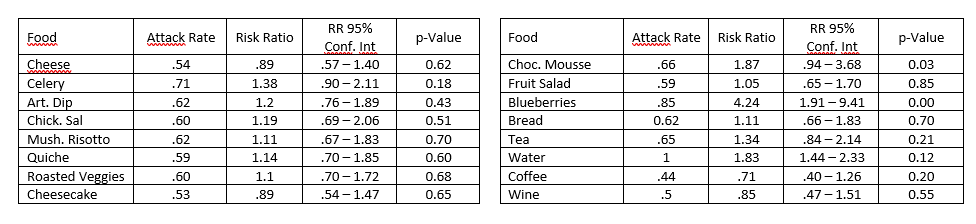

In [62]:
outbreak_59h_df <- outbreak_clean_df %>%
    mutate(illness_first_59h = factor(if_else(b_3_experienced_ilness == "Yes" &
                                              b_4_symptom_time <= 59, "Yes", "No")))

In [63]:
outbreak_59h_df %>%
    filter(illness_first_59h == "Yes")

interviewee_id,interviewer,interview_date,a_1_initials,a_1_age,a_2_gender,a_self_identified_gender,b_3_experienced_ilness,b_4_symptom_time,diarrhea,⋯,d_16_secondary_case_age_2,d_16_date_symptom_onset_2,d_16_symptom_type_2,d_16_secondary_case_age_3,d_16_date_symptom_onset_3,d_16_symptom_type_3,d_17_recent_travel,d_17_destination,d_18_other_information,illness_first_59h
<int>,<chr>,<date>,<chr>,<int>,<fct>,<chr>,<fct>,<int>,<fct>,⋯,<int>,<date>,<chr>,<int>,<date>,<chr>,<fct>,<chr>,<chr>,<fct>
1,abc,2021-01-15,MB,41,Female,.,Yes,28,Yes,⋯,NA,NA,.,NA,NA,.,No,.,5 other household members who attended the party developed symptoms,Yes
2,abc,2021-01-15,JB,37,Male,.,Yes,30,Yes,⋯,NA,NA,.,NA,NA,.,No,.,5 other household members who attended the party developed symptoms,Yes
3,abc,2021-01-15,RB,7,Female,.,Yes,33,Yes,⋯,NA,NA,.,NA,NA,.,No,.,5 other household members who attended the party also developed symptoms,Yes
8,abc,2021-01-15,AG,28,Male,.,Yes,33,Yes,⋯,NA,NA,.,NA,NA,.,No,.,2 other household members who attended the party developed symptoms,Yes
9,abc,2021-01-15,MG,10,Female,.,Yes,56,Yes,⋯,NA,NA,.,NA,NA,.,No,.,2 other household members who attended the party develop symptoms,Yes
10,abc,2021-01-15,AB,25,Male,.,Yes,20,Yes,⋯,NA,NA,.,NA,NA,.,No,.,1 other household member/s who attended the party developed symptoms,Yes
13,abc,2021-01-15,RW,7,Male,.,Yes,28,Yes,⋯,NA,NA,.,NA,NA,.,No,.,2 other household member/s who attended the party developed symptoms,Yes
14,abc,2021-01-15,DW,8,Female,.,Yes,35,Yes,⋯,NA,NA,.,NA,NA,.,No,.,2 other household member/s who attended the party developed symptoms,Yes
16,abc,2021-01-15,CJ,35,Female,.,Yes,24,Yes,⋯,NA,NA,.,NA,NA,.,No,.,2 other household member/s who attended the party developed symptoms,Yes


In [64]:
library(epitools)

In [65]:
outbreak_59h_df %>%
    count(illness_first_59h, c_13_blueberries)

illness_first_59h,c_13_blueberries,n
<fct>,<fct>,<int>
No,No,20
No,Yes,5
Yes,No,5
Yes,Yes,28


In [66]:
(blueberries_RR_table <- matrix(c(20,5,5,28),nrow = 2, ncol = 2))

20,5
5,28


In [67]:
riskratio(blueberries_RR_table, rev="b")

,Disease2,Disease1,Total
Exposed2,28,5,33
Exposed1,5,20,25
Total,33,25,58
,estimate,lower,upper
Exposed2,1.00,NA,NA
Exposed1,5.28,2.300402,12.11892
,midp.exact,fisher.exact,chi.square
Exposed2,NA,NA,NA
Exposed1,7.833206e-07,8.08975e-07,7.863966e-07


In [69]:
outbreak_59h_df %>%
    count(illness_first_59h, c_13_choc_mousse)

illness_first_59h,c_13_choc_mousse,n
<fct>,<fct>,<int>
No,No,11
No,Yes,14
Yes,No,6
Yes,Yes,27


In [70]:
(choc_mousse_RR_table <- matrix(c(11,14,6,27),nrow = 2, ncol = 2))

11,6
14,27


In [71]:
riskratio.small(choc_mousse_RR_table, rev="b")

,Disease2,Disease1,Total
Exposed2,27,14,41
Exposed1,6,11,17
Total,33,25,58
,estimate,lower,upper
Exposed2,1.000000,NA,NA
Exposed1,1.811765,1.043921,3.144387
,midp.exact,fisher.exact,chi.square
Exposed2,NA,NA,NA
Exposed1,0.03990475,0.04370947,0.03241993
